In [36]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D, GRU # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
from keras import metrics
from keras.utils import plot_model
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [37]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.9146 35.4470          0.0    -13.5180    0.747460      5.0862   
          35.4490          0.0    -13.6410    0.063185      4.4150   
          35.4510          0.0    -13.6300    0.400600      4.7172   
          35.4530          0.0    -13.5690   -0.500240      4.0645   
          35.4550          0.0    -13.5060   -1.107300      2.9022   
...                        ...         ...         ...         ...   
-117.6414 37.6236          0.0      4.8278   -1.306500         NaN   
          37.6256          0.0      4.8698   -1.213700         NaN   
          37.6276          0.0      4.8693   -1.189300         NaN   
          37.6296          0.0      4.8277   -1.190600         NaN   
          37.6316          0.0      4.8729   -1.120000         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.9146 35.4470      -1.9668     1.29470     -5.1067     0.87440   
          35.4490      -2.5803     0.74781     -5.7172     0.19724   
          35.4510      -2.3308     0.99271     -5.4875     0.39402   
          35.4530      -2.8942     0.21585     -6.1191     0.00391   
          35.4550      -4.1777    -1.13510     -7.3587    -1.35330   
...                        ...         ...         ...         ...   
-117.6414 37.6236      -4.1515    -1.99990      9.9914    -3.10550   
          37.6256      -4.1588    -1.73720     10.4130    -2.95840   
          37.6276      -4.1632    -1.71070     10.4830    -2.93180   
          37.6296      -4.1240    -1.89490     10.1870    -3.01790   
          37.6316      -4.1457    -1.70330     10.5180    -2.92690   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.9146 35.4470     -5.15400     2.55900  ...     -6.5221     -3.3514   
          35.4490     -5.74300     1.93390  ...     -7.3692     -4.3340   
          35.4510     -5.48650     2.15280  ...     -6.8486     -4.0115   
          35.4530     -5.82860     1.83380  ...     -5.6745     -3.0299   
          35.4550     -7.29700     0.46061  ...     -7.9927     -5.4295   
...                        ...         ...  ...         ...         ...   
-117.6414 37.6236     -0.32799     6.98990  ...      8.5800     11.3410   
          37.6256     -0.33838     7.34020  ...      9.2515     11.9960   
          37.6276     -0.34454     7.39780  ...      8.8321     11.5700   
          37.6296     -0.31614     7.12450  ...     10.3320     13.0730   
          37.6316     -0.33153     7.38390  ...      9.3376     12.0530   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.9146 35.4470      -4.1662     -6.3219     -11.361     -9.6235   
          35.4490      -5.1182     -7.1733     -12.311    -10.5640   
          35.4510      -4.7786     -6.7119     -11.929    -10.1480   
          35.4530      -3.7675     -5.5943     -10.838     -9.0944   
          35.4550      -6.2580     -7.9820     -13.136    -11.3610   
...                        ...         ...         ...         ...   
-117.6414 37.6236       5.5704      7.6113      17.002      9.6014   
          37.6256       6.0621      8.2387      17.526      9.5942   
          37.6276       5.5897      7.8226      17.066      9.2927   
          37.6296       7.2137      9.3699      18.582     10.8610   
          37.6316       6.0863      8.3323      17.499      9.8190   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.9146 35.4470      -4.9249     -3.5976     -5.1346     -4.4193  
          35.4490      -5.7429     -4.3201     -5.8205     -5.0144  
          35.4510      -5.1576     

In [38]:
df9=pd.read_csv('InSAR_data_south/displacement/rain_matching_InSar_dimension.csv')
df9.isnull().sum().sum()

0

In [39]:
df2=pd.read_csv('InSAR_data_south/displacement/groundwater.csv')
df2=df2.set_index([df2.columns[0],df2.columns[1]])
df2.columns=pd.to_datetime(df2.columns, format='%Y-%m-%d')
df2=df2.dropna(axis=0, how='all')#drop full nan rows
for y in range(df.columns.size):# includes all dates and adds nans
    if df.columns[y] != df2.columns[y]: #if column is misssing insert it
        df2.insert(loc=y,column=df.columns[y],value=np.nan*11286,allow_duplicates=False)
df2

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-120.9486,37.6316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.653992,75.813688,75.973384,76.0,NaN,NaN,NaN,NaN,NaN,NaN
-120.8926,36.7114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.8846,36.6994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.8746,36.6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-120.1368,35.6991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.898190,151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-119.0351,36.3933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-119.0271,36.3793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-119.0571,36.4493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.978182,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.0 ]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120.2]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.4]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.6]
# dftest2



# dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.78  ]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 36.4]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.5]
# dftest2
# dftest=df.iloc[df.index.get_level_values('Longitude')< -119.3  ]
# dftest=dftest.iloc[dftest.index.get_level_values('Longitude')> -119.4]
# dftest=dftest.iloc[dftest.index.get_level_values('Latitude')> 35.9]
# dftest=dftest.iloc[dftest.index.get_level_values('Latitude')< 36]
# dftest
# dftest3=df.iloc[df.index.get_level_values('Longitude')< -118.83 ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Longitude')> -119 ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Latitude')> 35.9  ]
# dftest3=dftest3.iloc[dftest3.index.get_level_values('Latitude')< 36	  ]
# dftest3
# dftest4=df.iloc[df.index.get_level_values('Longitude')< -119.1  ]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Longitude')> -119.2]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Latitude')> 35.4]
# dftest4=dftest4.iloc[dftest4.index.get_level_values('Latitude')< 35.5]
# dftest4
# # -120.3907	37.7234
# # -119.8049	36.0712
# dftest5=df.iloc[df.index.get_level_values('Longitude')< -119.9  ]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Longitude')> -120]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Latitude')> 36.2]
# dftest5=dftest5.iloc[dftest5.index.get_level_values('Latitude')< 36.4]
# dftest5
# dftest6=df.iloc[df.index.get_level_values('Longitude')< -120.17  ]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Longitude')> -120.3]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Latitude')> 36.4]
# dftest6=dftest6.iloc[dftest6.index.get_level_values('Latitude')< 36.6]
# for x in range(len(dftest6.iloc[: , -1].values)-1,-1,-1):
#     if dftest6.iloc[: , -1].values[x] <-11 or dftest6.iloc[: , -1].values[x] >-4:
#         dftest6.drop(index=dftest6.index[x], inplace=True)
# dftest=dftest.append(dftest2) dont allow dups
# dftest=dftest.append(dftest3)
# dftest=dftest.append(dftest4)
# dftest=dftest.append(dftest5)
# dftest=dftest.append(dftest6)

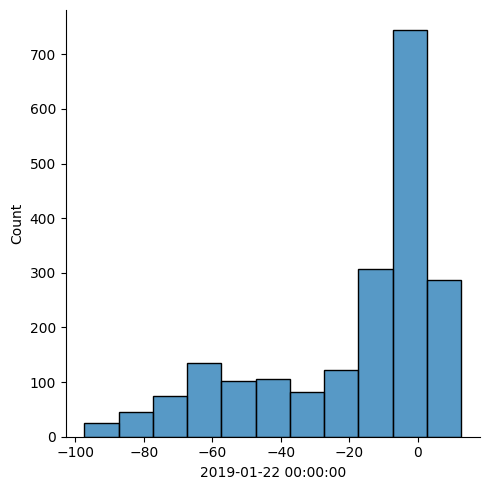

In [41]:
dftest2=df.iloc[df.index.get_level_values('Longitude')< -118.9 ]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -119.6]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.5]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.5]
dftest2
for row in range(len(dftest2.index)-1,-1,-1):
    if dftest2.index[row] not in df2.index:
            dftest2.drop(index=dftest2.index[row], inplace=True)
dftest2
import seaborn as sns
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [42]:
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.5989 35.6191          0.0    -5.83380    0.798870     1.48660   
          35.8191          0.0    -5.97430    0.699620     0.12906   
          35.9332          0.0    -4.91740    0.934110     0.92649   
          36.1332          0.0    -5.42950   -0.858010    -2.98700   
          36.2172          0.0    -3.20560    0.637210    -1.18920   
...                        ...         ...         ...         ...   
-118.9351 35.9912          0.0     1.31960   -0.454550    -1.12980   
-118.9331 35.8431          0.0    -0.27523    0.340730     0.11561   
-118.9311 35.6111          0.0    -2.60280    0.000017     0.94402   
          36.0432          0.0     1.67880   -0.808910    -1.57380   
-118.9271 35.7791          0.0    -0.74982    0.704870     0.91393   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.5989 35.6191      -1.2506      1.6764    0.481240     0.65481   
          35.8191      -1.6023      1.4932   -0.577090    -0.42729   
          35.9332      -1.1833      2.4951    0.115110     0.68624   
          36.1332      -6.1230     -5.1499   -9.224700   -10.07100   
          36.2172      -5.0650     -6.1981   -9.272800   -11.41000   
...                        ...         ...         ...         ...   
-118.9351 35.9912      -2.1960     -2.2949    0.732390    -2.64910   
-118.9331 35.8431      -1.8977     -1.7240    1.244300    -2.65080   
-118.9311 35.6111      -2.1042     -1.8717    0.510950    -2.71470   
          36.0432      -1.4608     -2.8152    0.054982    -2.94200   
-118.9271 35.7791      -2.0152     -1.4199    1.315100    -2.26120   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.5989 35.6191     -0.15735    0.419500  ...    -0.86527     0.14532   
          35.8191     -3.59370   -0.505490  ...   -15.73700   -16.03600   
          35.9332     -1.17870    0.874000  ...    -4.41230    -4.16900   
          36.1332    -13.59100  -15.007000  ...   -63.91400   -64.10600   
          36.2172    -15.18400  -18.425000  ...   -78.06400   -77.41800   
...                        ...         ...  ...         ...         ...   
-118.9351 35.9912     -0.57953   -0.463840  ...     3.31190     2.48770   
-118.9331 35.8431      0.44136    0.072182  ...     5.34060     4.61450   
-118.9311 35.6111      0.42639    0.334300  ...     4.61750     4.28460   
          36.0432     -1.33580   -1.282900  ...     2.86280     1.83510   
-118.9271 35.7791      0.90483    0.531310  ...     6.66690     6.17380   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.5989 35.6191     -0.73293    -0.61293     -0.4593     -1.7905   
          35.8191    -15.68500   -15.41400    -16.2360    -17.3340   
          35.9332     -4.17270    -3.54720     -4.8657     -4.6494   
          36.1332    -64.50000   -63.98900    -65.6910    -64.4540   
          36.2172    -77.83500   -77.35200    -78.6710    -78.2460   
...                        ...         ...         ...         ...   
-118.9351 35.9912      3.79060     3.64290      3.8131      2.7015   
-118.9331 35.8431      5.84310     5.64300      5.8181      5.7786   
-118.9311 35.6111      5.32610     5.08630      5.6278      4.1805   
          36.0432      3.50580     3.38160      3.2020      2.7933   
-118.9271 35.7791      7.06940     7.05940      7.1988      6.9346   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.5989 35.6191     0.060279      1.2174    -0.36071    -0.50929  
          35.8191   -15.526000    -15.5350   -16.68300   -16.36900  
          35.9332    -2.795000     

In [52]:
# buckets = [0] * 110
import math
# #math.modf(dftest2.iloc[: , -1].values[0])
# #dftest2.iloc[: , -1].values[0]
# for x in range(len(dftest2.iloc[: , -1].values)-1,-1,-1):
#     r,l=math.modf(dftest2.iloc[: , -1].values[x])
#     if l<=0:
#        l=-1*l
#     else:
#         l=l+100    
#     if buckets[int(l)]>5:
#         dftest2.drop(index=dftest2.index[x], inplace=True)
#     else:
#         buckets[int(l)]+=1
buckets = [0] * 120
#math.modf(dftest2.iloc[: , -1].values[0])
#dftest2.iloc[: , -1].values[0]
for x in range(len(dftest2.iloc[: , -1].values)-1,-1,-1):
    r,l=math.modf(dftest2.iloc[: , -1].values[x])
    if l >=0:
        l=l+100
    else:
        l=-1*l
    if buckets[int(l)]>3 and (l<80 or l>=100):
        dftest2.drop(index=dftest2.index[x], inplace=True)
    else:
        buckets[int(l)]+=1


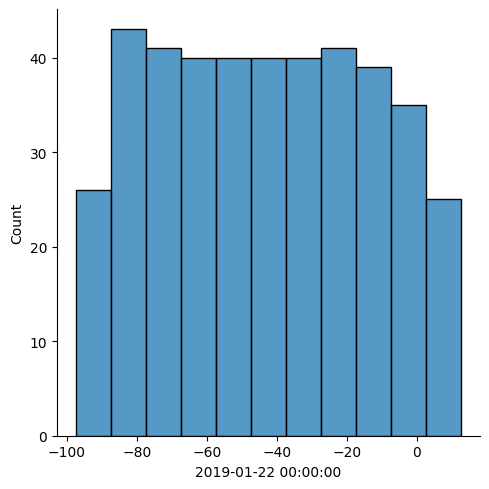

In [53]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [51]:
dftemp=dftest2


In [46]:
dftest2.index.size

519

In [47]:
for x in dftest2.iloc[: , -1].values:
    print(x)

-65.498
-77.469
-65.278
-69.111
-69.708
-66.836
-73.597
-66.02
-72.177
-62.393
-61.439
-71.401
-65.64
-71.578
-67.707
-67.319
-63.908
-70.231
-71.606
-60.189
-63.636
-64.122
-63.464
-65.455
-61.643
-53.654
-63.407
-64.474
-61.203
-75.405
-70.806
-83.407
-61.723
-75.488
-62.892
-61.484
-64.407
-69.237
-84.53
-60.489
-62.487
-96.017
-69.494
-32.845
-66.857
-91.734
-81.245
-69.9
-74.91
-70.388
-85.424
-86.63
-73.808
-83.623
-86.199
-84.375
-60.627
-71.457
-78.227
-75.507
-87.557
-77.436
-81.885
-76.617
-80.681
-81.86
-73.463
-32.261
-81.365
-76.869
-83.741
-66.653
-75.168
-72.693
-74.887
-88.575
-71.978
-72.457
-85.254
-63.872
-67.863
-80.773
-65.328
-87.08
-77.075
-66.187
-70.043
-87.615
-72.924
-69.991
-76.039
-91.942
-67.103
-63.602
-61.964
-71.849
-73.495
-65.836
-70.901
-78.068
-96.625
-61.173
-80.252
-61.734
-61.304
-90.127
-63.662
-93.871
-65.846
-86.433
-53.942
-75.3
-63.343
-86.939
-94.024
-87.57
-79.324
-88.145
-74.639
-79.979
-63.499
-90.565
-75.019
-87.208
-96.115
-65.421
-63.

In [54]:
dftest2

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-119.5609,36.1672,0.0,-5.35470,-2.365800,-5.38810,-8.0230,-7.35960,-10.658000,-11.5740,-14.73600,-15.653000,...,-51.2880,-52.2000,-51.5510,-50.8460,-52.1710,-51.1730,-51.0260,-51.1030,-53.1130,-53.6540
-119.5489,36.0072,0.0,-6.98510,-2.425400,-5.59300,-8.2796,-7.10480,-11.352000,-13.1490,-16.28400,-17.528000,...,-80.4520,-81.3120,-81.3700,-81.0500,-82.8020,-81.8950,-80.9560,-82.2640,-83.5630,-83.4070
-119.5369,36.0472,0.0,-6.52240,-2.652600,-7.67760,-11.1110,-10.59000,-14.676000,-17.0200,-20.39000,-22.219000,...,-82.7120,-83.1190,-82.8720,-82.5070,-84.1300,-83.3090,-83.1980,-83.6720,-84.9170,-84.5300
-119.5329,36.0152,0.0,-7.31990,-3.102300,-7.01660,-9.4511,-8.87950,-13.596000,-15.7800,-19.31200,-21.342000,...,-92.7010,-93.6410,-93.4770,-93.2590,-94.9470,-94.3050,-93.6450,-94.7880,-96.0660,-96.0170
-119.5289,35.9512,0.0,-5.69540,-0.297000,-1.17090,-3.5007,-0.99811,-3.422100,-3.9274,-5.57050,-4.514200,...,-31.5990,-31.9420,-31.8580,-31.5220,-32.9980,-32.5920,-31.5850,-32.0960,-33.1620,-32.8450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-118.9351,35.9912,0.0,1.31960,-0.454550,-1.12980,-2.1960,-2.29490,0.732390,-2.6491,-0.57953,-0.463840,...,3.3119,2.4877,3.7906,3.6429,3.8131,2.7015,5.1692,5.8056,3.2722,3.7133
-118.9331,35.8431,0.0,-0.27523,0.340730,0.11561,-1.8977,-1.72400,1.244300,-2.6508,0.44136,0.072182,...,5.3406,4.6145,5.8431,5.6430,5.8181,5.7786,7.0684,8.0765,5.0210,5.4701
-118.9311,35.6111,0.0,-2.60280,0.000017,0.94402,-2.1042,-1.87170,0.510950,-2.7147,0.42639,0.334300,...,4.6175,4.2846,5.3261,5.0863,5.6278,4.1805,6.4902,7.5899,4.7841,5.1107


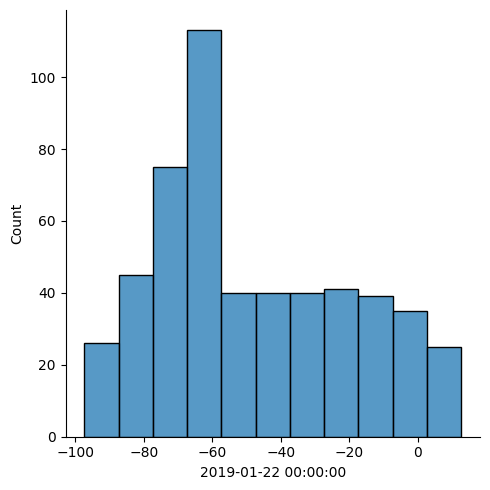

In [49]:
import seaborn as sns
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)
# 60 20 20
#60% is my training 


In [55]:
dftest2.to_csv('E:/DSFellowship/InSAR_data_south/displacement/trainingvalidation.csv')